In [2]:
pip install yfinance

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

/usr/local/lib/python3.10/dist-packages/yfinance/base.py:48: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  _empty_series = pd.Series()


In [4]:
start = '2005-01-01'
end = '2020-12-31'

df = yf.download('AAPL', start=start, end=end)

df.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2005-01-03,1.156786,1.162679,1.117857,1.130179,0.956809,691992000
2005-01-04,1.139107,1.169107,1.124464,1.141786,0.966635,1096810400
2005-01-05,1.151071,1.165179,1.143750,1.151786,0.975101,680433600
2005-01-06,1.154821,1.159107,1.130893,1.152679,0.975857,705555200
2005-01-07,1.160714,1.243393,1.156250,1.236607,1.046911,2227450400


In [5]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-12-23,132.160004,132.429993,130.779999,130.960007,128.523270,88223700
2020-12-24,131.320007,133.460007,131.100006,131.970001,129.514435,54930100
2020-12-28,133.990005,137.339996,133.509995,136.690002,134.146652,124486200
2020-12-29,138.050003,138.789993,134.339996,134.869995,132.360504,121047300
2020-12-30,135.580002,135.990005,133.399994,133.720001,131.231918,96452100


In [6]:
df=df.reset_index()
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2005-01-03,1.156786,1.162679,1.117857,1.130179,0.956809,691992000
1,2005-01-04,1.139107,1.169107,1.124464,1.141786,0.966635,1096810400
2,2005-01-05,1.151071,1.165179,1.143750,1.151786,0.975101,680433600
3,2005-01-06,1.154821,1.159107,1.130893,1.152679,0.975857,705555200
4,2005-01-07,1.160714,1.243393,1.156250,1.236607,1.046911,2227450400


In [7]:
df=df.drop(['Date','Adj Close'],axis=1)
df.head()

,Open,High,Low,Close,Volume
0,1.156786,1.162679,1.117857,1.130179,691992000
1,1.139107,1.169107,1.124464,1.141786,1096810400
2,1.151071,1.165179,1.143750,1.151786,680433600
3,1.154821,1.159107,1.130893,1.152679,705555200
4,1.160714,1.243393,1.156250,1.236607,2227450400


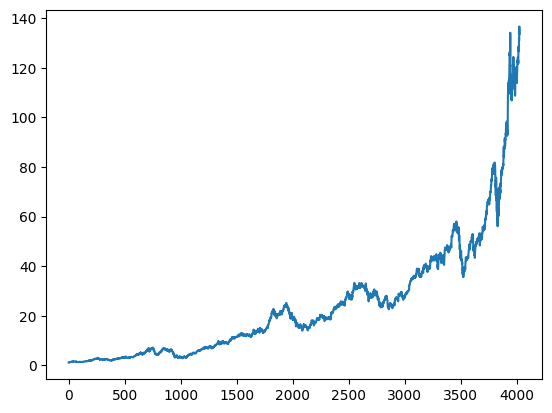

In [8]:
plt.plot(df.Close)

In [9]:
#moving avg for 100 days
ma100 = df.Close.rolling(100).mean()
ma100

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
4022    118.000475
4023    118.223525
4024    118.489800
4025    118.699475
4026    118.925550
Name: Close, Length: 4027, dtype: float64

In [10]:
#moving avg for 200 days
ma200 = df.Close.rolling(200).mean()
ma200

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
4022     98.809175
4023     99.158737
4024     99.494725
4025     99.866312
4026    100.218837
Name: Close, Length: 4027, dtype: float64

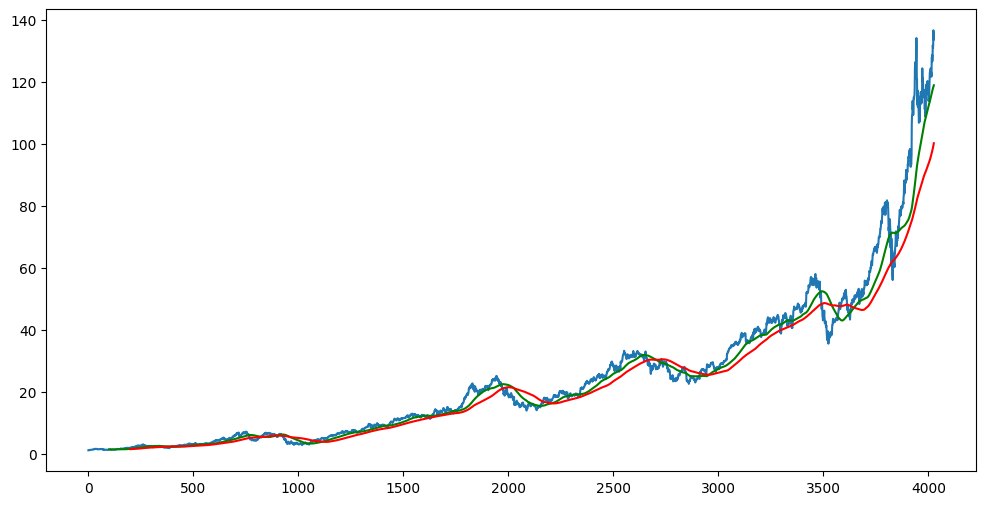

In [11]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100,'g')
plt.plot(ma200,'r')

In [12]:
df.shape

(4027, 5)

In [13]:
#splitting into training and testing

data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70):int(len(df))])

In [14]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [15]:
data_training_array = scaler.fit_transform(data_training)

In [16]:
data_training_array.shape

(2818, 1)

In [17]:
x_train=[]
y_train=[]

for i in range(100, data_training_array.shape[0]):
  x_train.append(data_training_array[i-100:i])
  y_train.append(data_training_array[i,0])

x_train,y_train = np.array(x_train), np.array(y_train)

In [18]:
x_train.shape


(2718, 100, 1)

In [19]:
#model

from keras.layers import Dense,Dropout,LSTM
from keras.models import Sequential

In [20]:
model=Sequential()
model.add(LSTM(units=50,activation='relu',return_sequences = True, input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units=60,activation='relu',return_sequences = True))
model.add(Dropout(0.3))

model.add(LSTM(units=80,activation='relu',return_sequences = True))
model.add(Dropout(0.4))

model.add(LSTM(units=120,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units = 1))

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [22]:
model.compile(optimizer='adam',loss='mean_squared_error')
model.fit(x_train,y_train,epochs=50)

Epoch 1/50
85/85 [==============================] - 42s 348ms/step - loss: 0.0245
Epoch 2/50
85/85 [==============================] - 24s 280ms/step - loss: 0.0068
Epoch 3/50
85/85 [==============================] - 24s 279ms/step - loss: 0.0058
Epoch 4/50
85/85 [==============================] - 24s 278ms/step - loss: 0.0053
Epoch 5/50
85/85 [==============================] - 24s 286ms/step - loss: 0.0049
Epoch 6/50
85/85 [==============================] - 24s 287ms/step - loss: 0.0047
Epoch 7/50
85/85 [==============================] - 23s 268ms/step - loss: 0.0044
Epoch 8/50
85/85 [==============================] - 24s 280ms/step - loss: 0.0044
Epoch 9/50
85/85 [==============================] - 24s 280ms/step - loss: 0.0041
Epoch 10/50
85/85 [==============================] - 24s 281ms/step - loss: 0.0037
Epoch 11/50
85/85 [==============================] - 24s 280ms/step - loss: 0.0039
Epoch 12/50
85/85 [==============================] - 24s 281ms/step - loss: 0.0039
Epoch 13/50
8

In [23]:
model.save('keras_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [24]:
past_100_days = data_training.tail(100)

In [25]:
final_df=past_100_days.append(data_testing, ignore_index=True)

<ipython-input-25-bda026c18f6e>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df=past_100_days.append(data_testing, ignore_index=True)


In [26]:
input_data = scaler.fit_transform(final_df)
input_data

array([[0.0513343 ],
       [0.0513124 ],
       [0.05512467],
       ...,
       [1.        ],
       [0.98404971],
       [0.97397133]])

In [27]:
x_test=[]
y_test=[]

for i in range(100, input_data.shape[0]):
  x_test.append(input_data[i-100:i])
  y_test.append(input_data[i,0])

x_test,y_test = np.array(x_test), np.array(y_test)

In [28]:
#pred

y_pred=model.predict(x_test)

38/38 [==============================] - 4s 82ms/step


In [29]:
y_pred.shape

(1209, 1)

In [30]:
y_test

array([0.03119935, 0.03424478, 0.03387232, ..., 1.        , 0.98404971,
       0.97397133])

In [31]:
scaler.scale_

array([0.00876386])

In [32]:
scale_factor=1/0.00876386
y_pred=y_pred*scale_factor
y_test=y_test*scale_factor

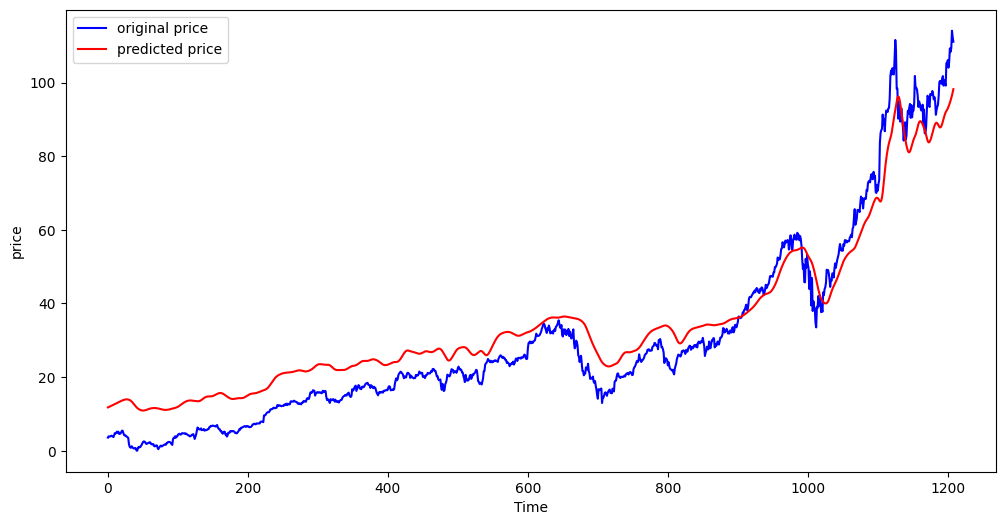

In [33]:
plt.figure(figsize=(12,6))
plt.plot(y_test, 'b', label = 'original price')
plt.plot(y_pred, 'r', label = 'predicted price')
plt.xlabel('Time')
plt.ylabel('price')
plt.legend()
plt.show()